#  SVD with Scikit Learn

In [1]:
from sklearn.utils.extmath import randomized_svd
import numpy as np

In [3]:
# matrix
data = np.array([
    [5,3,0,1,4],
    [4,0,0,1,3],
    [1,1,0,5,0],
    [1,0,0,4,4],
    [0,1,5,4,0]
])

u,s,vT = randomized_svd(data, n_components=5) # number of columns

print("u: ")
print(np.round(u, decimals=1))
print("\n sigma (s)")
print(np.round(s, decimals=1))
print("\n vT")
print(np.round(vT, decimals=1))

u: 
[[ 0.6 -0.5  0.4  0.3 -0.5]
 [ 0.4 -0.3  0.1 -0.2  0.8]
 [ 0.4  0.4 -0.5  0.7  0.2]
 [ 0.5  0.1 -0.6 -0.6 -0.3]
 [ 0.3  0.7  0.6 -0.2  0. ]]

 sigma (s)
[10.3  7.   3.8  2.6  1.6]

 vT
[[ 0.5  0.2  0.2  0.6  0.5]
 [-0.5 -0.   0.5  0.6 -0.4]
 [ 0.3  0.3  0.8 -0.5 -0.1]
 [ 0.3  0.5 -0.4  0.2 -0.7]
 [ 0.6 -0.7  0.1  0.1 -0.3]]


## Dimensionality reduction with SVD

In [5]:
u,s,vT = randomized_svd(data,n_components=2) # number of columns reduced to 2

# Reconstruction of reduced matrix
data_reduced = u.dot(np.diag(s))

print("\nOriginal data: \n\n",data,"\n\nSVD result for 2 main components: \n\n",np.round(data_reduced,decimals=1))
print("")


Original data: 

 [[5 3 0 1 4]
 [4 0 0 1 3]
 [1 1 0 5 0]
 [1 0 0 4 4]
 [0 1 5 4 0]] 

SVD result for 2 main components: 

 [[ 6.1 -3.2]
 [ 4.3 -2.3]
 [ 3.7  2.6]
 [ 5.   0.6]
 [ 3.4  5.1]]



## Wine dataset

In [ ]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

### 3D Plot

0

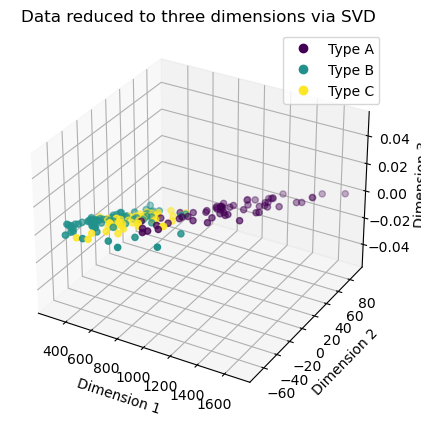

In [27]:
wine=load_wine()
data=wine.data
#print(data)

colors = wine.target 

u,s,vT = randomized_svd(data,n_components=3) # number of columns reduced to 2

# Reconstruction of reduced matrix
data_reduced = u.dot(np.diag(s))

# Extract the dimensions

x = data_reduced[:,0]
y = data_reduced[:,1]
z = data_reduced[:,2]

# plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
scatter = ax.scatter(x,y,c=colors,cmap='viridis')
plt.title('Data reduced to three dimensions via SVD')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Type A', 'Type B', 'Type C'])
plt.tight_layout(pad=3.0)        
                                                         
plt.savefig('3dplot-wine.png')
os.system('start 3dplot-wine.png')

#plt.show()

#print("\nOriginal data: \n\n",data,"\n\nSVD result for 3 main components: \n\n",np.round(data_reduced,decimals=1))
#print("")


### 3D Interactive Plot

In [39]:
# interactive graphic

import plotly.graph_objects as go

class_names = {0: 'Type A', 1: 'Type B', 2: 'Type C'}

fig = go.Figure()


for class_idx, class_name in class_names.items():
    mask = (colors == class_idx)
    fig.add_trace(go.Scatter3d(x=x[mask], y=y[mask], z=z[mask], mode='markers', 
                               marker=dict(color=class_idx, size=5, opacity=0.7),
                               name=class_name))

fig.update_layout(title='Data reduced to three dimensions via SVD',
                  scene=dict(xaxis_title='Dimension 1', yaxis_title='Dimension 2', zaxis_title='Dimension 3'))

fig.write_html("interactive_plot.html") # Graphic available in the images folder
